In [22]:
import pandas as pd

import numpy as np

from datetime import datetime, timedelta



# Generate mock transaction data

np.random.seed(42)

num_transactions = 5000

num_customers = 500

products = [f'Prod_{100+i}' for i in range(20)]

start_date = datetime(2022, 1, 1)

end_date = datetime(2023, 12, 31)

date_range_days = (end_date - start_date).days



transaction_data = []



# Customer spending profiles

customer_profiles = {

    f'CUST{1000+i}': {'avg_spend': np.random.uniform(10, 200), 'frequency_factor': np.random.uniform(0.1, 1)}

    for i in range(num_customers)

}





for i in range(num_transactions):

    customer_id = f'CUST{1000 + np.random.randint(0, num_customers)}'

    transaction_date = start_date + timedelta(days=np.random.randint(0, date_range_days))

    num_items_in_transaction = np.random.randint(1, 6)



    for _ in range(num_items_in_transaction):

        product_id = np.random.choice(products)

        quantity = np.random.randint(1, 4)

        unit_price = np.random.uniform(5, 100) * (customer_profiles[customer_id]['avg_spend'] / 50) # Tie price to customer profile somewhat

        unit_price = round(max(1.0, unit_price), 2)





        transaction_data.append({

            'TransactionID': f'TRX{50000+i}_{_}',

            'CustomerID': customer_id,

            'TransactionDate': transaction_date.strftime('%Y-%m-%d'),

            'ProductID': product_id,

            'Quantity': quantity,

            'UnitPrice': unit_price

        })



df_transactions = pd.DataFrame(transaction_data)

df_transactions['TotalPrice'] = df_transactions['Quantity'] * df_transactions['UnitPrice']



# Save to CSV

df_transactions.to_csv('customer_transactions_mock_data.csv', index=False)

print("Mock customer transaction data generated: customer_transactions_mock_data.csv")

print(df_transactions.head())




Mock customer transaction data generated: customer_transactions_mock_data.csv
  TransactionID CustomerID TransactionDate ProductID  Quantity  UnitPrice  \
0    TRX50000_0   CUST1302      2022-01-12  Prod_107         3      53.74   
1    TRX50000_1   CUST1302      2022-01-12  Prod_104         2      43.15   
2    TRX50000_2   CUST1302      2022-01-12  Prod_107         1      59.80   
3    TRX50001_0   CUST1267      2023-10-17  Prod_108         1     214.31   
4    TRX50001_1   CUST1267      2023-10-17  Prod_109         3     312.02   

   TotalPrice  
0      161.22  
1       86.30  
2       59.80  
3      214.31  
4      936.06  


In [23]:
# --- RFM Calculation Example (to be done in the task notebook) ---

snapshot_date = pd.to_datetime(end_date + timedelta(days=1))

df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'])



rfm = df_transactions.groupby('CustomerID').agg(

    Recency=('TransactionDate', lambda x: (snapshot_date - x.max()).days),
    Frequency=('TransactionID', 'count'), # Using TransactionID count for simplicity, could be unique days

    MonetaryValue=('TotalPrice', 'sum')
 ).reset_index()

print("\nSample RFM data (first 5 rows):")

print(rfm.head())


Sample RFM data (first 5 rows):
  CustomerID  Recency  Frequency  MonetaryValue
0   CUST1000       10         41        6855.79
1   CUST1001       50         10        2856.43
2   CUST1002        8         25        2175.73
3   CUST1003       23         33        1085.57
4   CUST1004      135         27        6887.81


# Data Loading and Handling

In [24]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset (replace 'transactions.csv' with your file)
df_transactions = pd.read_csv("customer_transactions_mock_data.csv")

# Quick look at the data
print("Dataset shape:", df_transactions.shape)
print("\nSample rows:")
print(df_transactions.head())
print("\nData types:")
print(df_transactions.info())


Dataset shape: (15143, 7)

Sample rows:
  TransactionID CustomerID TransactionDate ProductID  Quantity  UnitPrice  \
0    TRX50000_0   CUST1302      2022-01-12  Prod_107         3      53.74   
1    TRX50000_1   CUST1302      2022-01-12  Prod_104         2      43.15   
2    TRX50000_2   CUST1302      2022-01-12  Prod_107         1      59.80   
3    TRX50001_0   CUST1267      2023-10-17  Prod_108         1     214.31   
4    TRX50001_1   CUST1267      2023-10-17  Prod_109         3     312.02   

   TotalPrice  
0      161.22  
1       86.30  
2       59.80  
3      214.31  
4      936.06  

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15143 entries, 0 to 15142
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    15143 non-null  object 
 1   CustomerID       15143 non-null  object 
 2   TransactionDate  15143 non-null  object 
 3   ProductID        15143 non-null  object 
 4  

In [25]:
# Check missing values
print("\nMissing values:")
print(df_transactions.isnull().sum())


Missing values:
TransactionID      0
CustomerID         0
TransactionDate    0
ProductID          0
Quantity           0
UnitPrice          0
TotalPrice         0
dtype: int64


In [26]:
# Convert TransactionDate to datetime
df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'], errors='coerce')

# Drop rows where date conversion failed (NaT)
df_transactions = df_transactions.dropna(subset=['TransactionDate'])

# Verify conversion
print("\nTransactionDate type:", df_transactions['TransactionDate'].dtype)
print(df_transactions['TransactionDate'].describe())



TransactionDate type: datetime64[ns]
count                            15143
mean     2022-12-28 14:33:25.996169984
min                2022-01-01 00:00:00
25%                2022-06-27 12:00:00
50%                2022-12-28 00:00:00
75%                2023-07-01 00:00:00
max                2023-12-30 00:00:00
Name: TransactionDate, dtype: object


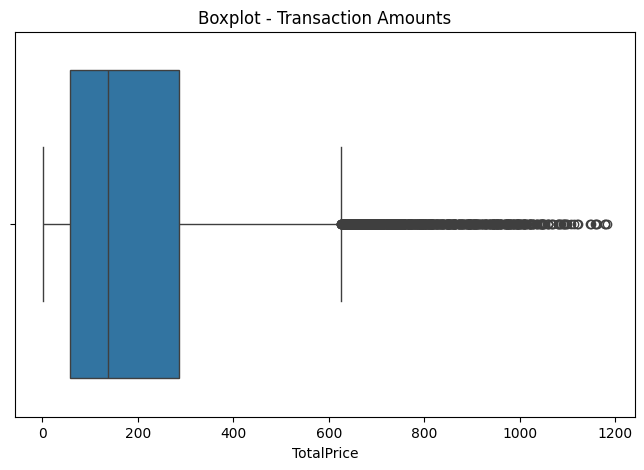


Data shape after outlier removal: (14991, 7)


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize TotalPrice distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=df_transactions['TotalPrice'])
plt.title("Boxplot - Transaction Amounts")
plt.show()

# Remove extreme outliers (e.g., values beyond 99th percentile)
q99 = df_transactions['TotalPrice'].quantile(0.99)
df_transactions = df_transactions[df_transactions['TotalPrice'] <= q99]

print("\nData shape after outlier removal:", df_transactions.shape)


# RFM analysis

In [28]:
# define snapshot date
from datetime import timedelta

# Snapshot date = one day after the most recent transaction
snapshot_date = df_transactions['TransactionDate'].max() + timedelta(days=1)
print("Snapshot Date:", snapshot_date)


Snapshot Date: 2023-12-31 00:00:00


In [29]:
# Complete RFM Calculation
rfm = df_transactions.groupby('CustomerID').agg(
    Recency=('TransactionDate', lambda x: (snapshot_date - x.max()).days),
    Frequency=('TransactionID', 'count'),              # number of purchases
    MonetaryValue=('TotalPrice', 'sum')                # total spending
).reset_index()

print("\n✅ RFM Table (first 5 rows):")
print(rfm.head())



✅ RFM Table (first 5 rows):
  CustomerID  Recency  Frequency  MonetaryValue
0   CUST1000        9         41        6855.79
1   CUST1001       49         10        2856.43
2   CUST1002        7         25        2175.73
3   CUST1003       22         33        1085.57
4   CUST1004      134         27        6887.81


# Exploratort data Analysis

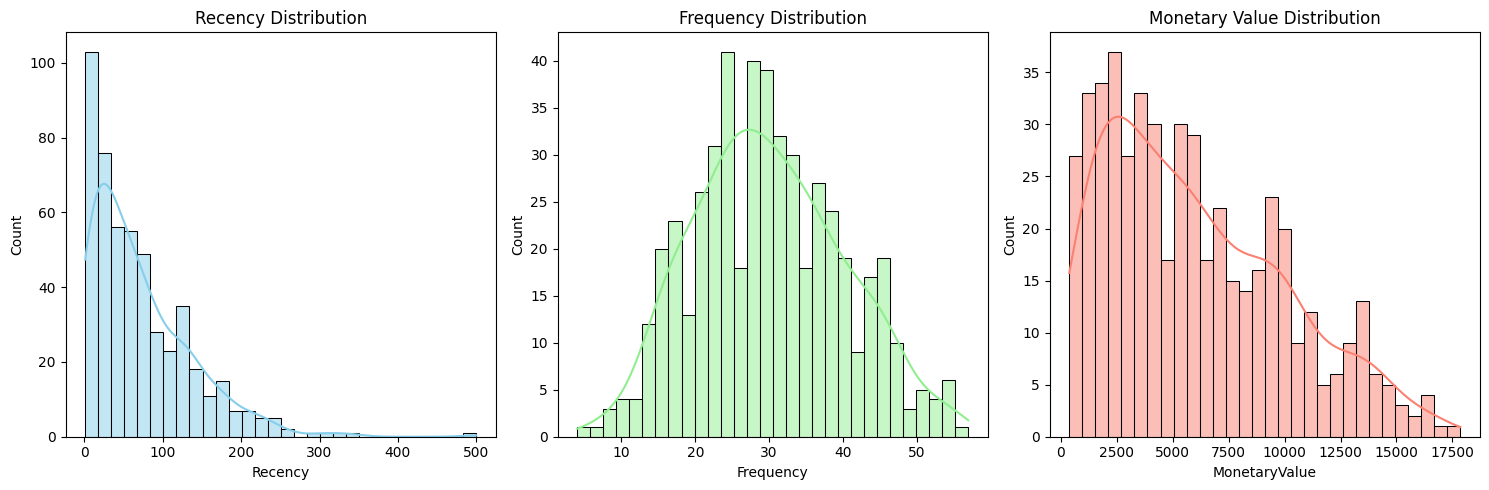

In [30]:
# visualize RFM distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

# Recency
plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=30, kde=True, color='skyblue')
plt.title("Recency Distribution")

# Frequency
plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=30, kde=True, color='lightgreen')
plt.title("Frequency Distribution")

# Monetary Value
plt.subplot(1,3,3)
sns.histplot(rfm['MonetaryValue'], bins=30, kde=True, color='salmon')
plt.title("Monetary Value Distribution")

plt.tight_layout()
plt.show()


In [31]:
# check skewness
print("Skewness of RFM values:")
print(rfm[['Recency','Frequency','MonetaryValue']].skew())


Skewness of RFM values:
Recency          1.633076
Frequency        0.227762
MonetaryValue    0.675751
dtype: float64


In [32]:
# applying log transformations

import numpy as np
import matplotlib.pyplot as plt

# Copy original RFM
rfm_transformed = rfm.copy()

# Apply log(1+x) to avoid issues with 0 values
rfm_transformed[['Recency','Frequency','MonetaryValue']] = rfm_transformed[['Recency','Frequency','MonetaryValue']].apply(lambda x: np.log1p(x))



# Compare new skewness
print("Skewness after transformation:")
print(rfm_transformed[['Recency','Frequency','MonetaryValue']].skew())


Skewness after transformation:
Recency         -0.697874
Frequency       -0.792587
MonetaryValue   -0.644011
dtype: float64


In [33]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm_transformed[['Recency','Frequency','MonetaryValue']])

print("Scaled Features (first 5 rows):")
print(X_scaled[:5])


Scaled Features (first 5 rows):
[[-1.31345023  1.00590737  0.50798337]
 [ 0.10403915 -2.69308795 -0.54573273]
 [-1.50998072 -0.31815036 -0.87328837]
 [-0.57987746  0.42250215 -1.70969371]
 [ 0.97883141 -0.11354498  0.51359187]]


# Clustering

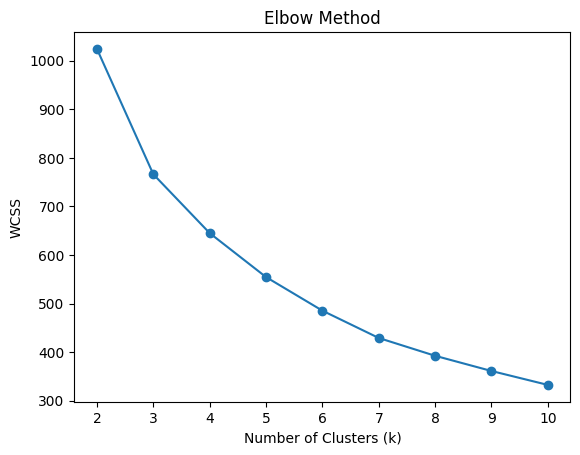

In [34]:
# Elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for k in range(2, 11):  # test k=2..10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()


In [35]:
# silhoutte score
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.298
k=3, Silhouette Score=0.308
k=4, Silhouette Score=0.303
k=5, Silhouette Score=0.261
k=6, Silhouette Score=0.264
k=7, Silhouette Score=0.272
k=8, Silhouette Score=0.272
k=9, Silhouette Score=0.275
k=10, Silhouette Score=0.276


In [36]:
# apply k-means with the best k
best_k = 3 # change based on Elbow/Silhouette results
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

print("✅ Clustered RFM (first 5 rows):")
print(rfm.head())

# Cluster Profiles
print("\nCluster Means (Unscaled RFM):")
print(rfm.groupby('Cluster')[['Recency','Frequency','MonetaryValue']].mean())


✅ Clustered RFM (first 5 rows):
  CustomerID  Recency  Frequency  MonetaryValue  Cluster
0   CUST1000        9         41        6855.79        0
1   CUST1001       49         10        2856.43        1
2   CUST1002        7         25        2175.73        0
3   CUST1003       22         33        1085.57        0
4   CUST1004      134         27        6887.81        2

Cluster Means (Unscaled RFM):
            Recency  Frequency  MonetaryValue
Cluster                                      
0         10.200000  30.330435    5075.100348
1        107.380645  20.683871    2876.960452
2         78.204348  36.073913    8508.920957


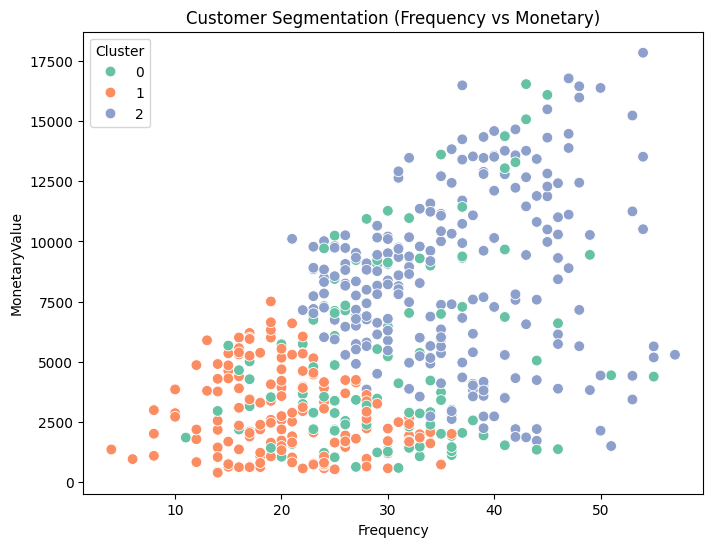

In [37]:
# visualize clusters
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=rfm['Frequency'], y=rfm['MonetaryValue'], 
    hue=rfm['Cluster'], palette="Set2", s=60
)
plt.title("Customer Segmentation (Frequency vs Monetary)")
plt.show()


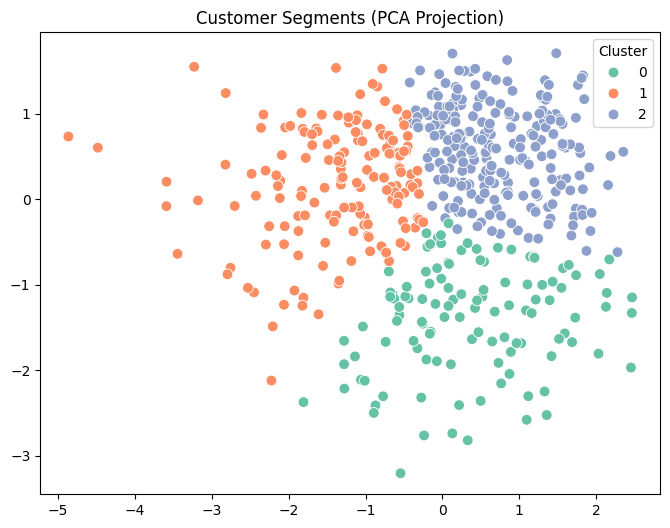

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=rfm['Cluster'], palette="Set2", s=60)
plt.title("Customer Segments (PCA Projection)")
plt.show()


# segment profiling and interpretation

In [40]:
# Average RFM values per cluster
cluster_profile = rfm.groupby('Cluster')[['Recency','Frequency','MonetaryValue']].mean().round(2)

# Add size of each cluster
cluster_profile['NumCustomers'] = rfm.groupby('Cluster')['CustomerID'].nunique()

print("✅ Cluster Profiles:")
print(cluster_profile)


✅ Cluster Profiles:
         Recency  Frequency  MonetaryValue  NumCustomers
Cluster                                                 
0          10.20      30.33        5075.10           115
1         107.38      20.68        2876.96           155
2          78.20      36.07        8508.92           230


In [42]:
# Define cluster labels based on your analysis
segment_names = {
    0: "Loyal High Spenders",
    1: "At-Risk Low Spenders",
    2: "Potential Loyalists",
    3: "New Customers"
}

# Map cluster numbers to names
rfm['Segment'] = rfm['Cluster'].map(segment_names)

print("✅ Sample Labeled RFM Data:")
print(rfm[['CustomerID','Recency','Frequency','MonetaryValue','Cluster','Segment']].head())


✅ Sample Labeled RFM Data:
  CustomerID  Recency  Frequency  MonetaryValue  Cluster               Segment
0   CUST1000        9         41        6855.79        0   Loyal High Spenders
1   CUST1001       49         10        2856.43        1  At-Risk Low Spenders
2   CUST1002        7         25        2175.73        0   Loyal High Spenders
3   CUST1003       22         33        1085.57        0   Loyal High Spenders
4   CUST1004      134         27        6887.81        2   Potential Loyalists


In [44]:
# Summary report
segment_summary = rfm.groupby('Segment')[['Recency','Frequency','MonetaryValue']].mean().round(2)
segment_summary['NumCustomers'] = rfm['Segment'].value_counts()

print("📊 Customer Segmentation Summary:")
print(segment_summary)


📊 Customer Segmentation Summary:
                      Recency  Frequency  MonetaryValue  NumCustomers
Segment                                                              
At-Risk Low Spenders   107.38      20.68        2876.96           155
Loyal High Spenders     10.20      30.33        5075.10           115
Potential Loyalists     78.20      36.07        8508.92           230


# Visualiztion

C:\Users\Raaid Yousuf\AppData\Local\Temp\ipykernel_9268\481957968.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='NumCustomers', data=segment_counts, palette='viridis')


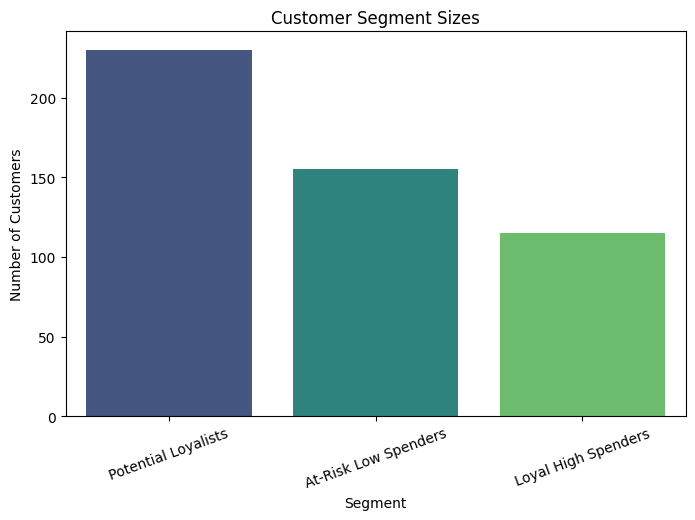

In [45]:
# Cluster size
import matplotlib.pyplot as plt
import seaborn as sns

# Count customers in each segment
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment','NumCustomers']

plt.figure(figsize=(8,5))
sns.barplot(x='Segment', y='NumCustomers', data=segment_counts, palette='viridis')
plt.title("Customer Segment Sizes")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.xticks(rotation=20)
plt.show()


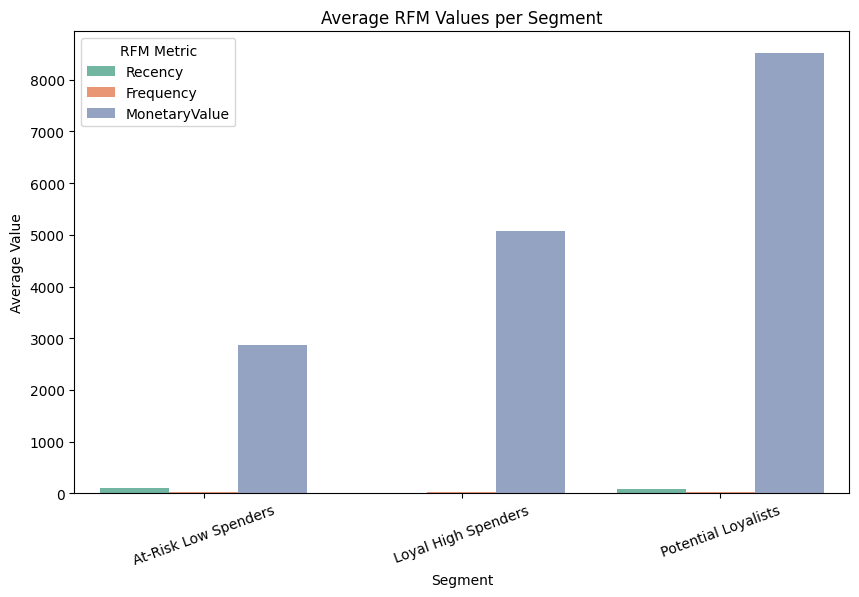

In [46]:
# Average RFM value per segment
rfm_means = rfm.groupby('Segment')[['Recency','Frequency','MonetaryValue']].mean().reset_index()
rfm_means = pd.melt(rfm_means, id_vars=['Segment'], value_vars=['Recency','Frequency','MonetaryValue'],
                    var_name='Metric', value_name='Value')

plt.figure(figsize=(10,6))
sns.barplot(x='Segment', y='Value', hue='Metric', data=rfm_means, palette='Set2')
plt.title("Average RFM Values per Segment")
plt.ylabel("Average Value")
plt.xlabel("Segment")
plt.xticks(rotation=20)
plt.legend(title="RFM Metric")
plt.show()


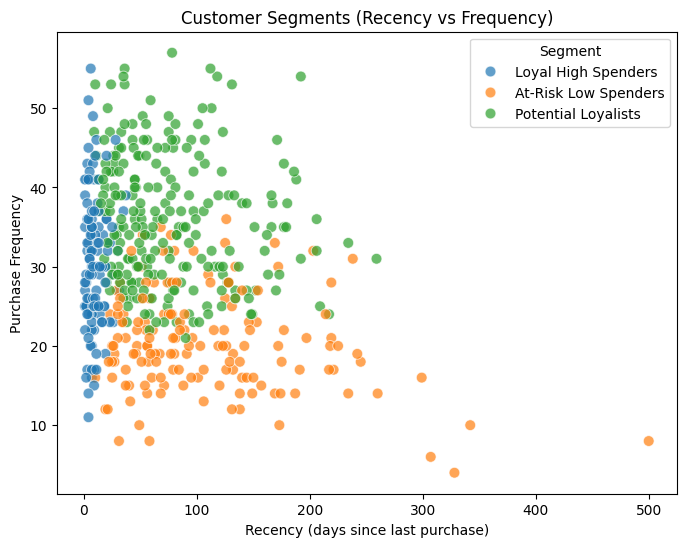

In [47]:
# 2d scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm, x='Recency', y='Frequency',
    hue='Segment', palette='tab10', s=60, alpha=0.7
)
plt.title("Customer Segments (Recency vs Frequency)")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Purchase Frequency")
plt.legend(title="Segment")
plt.show()


In [49]:
import pandas as pd

# Assuming your RFM DataFrame already has 'CustomerID' and 'Segment' columns
# Example: rfm[['CustomerID','Segment']].head()

# Save CustomerID and Segment to CSV
rfm[['CustomerID', 'Segment']].to_csv("customer_segments.csv", index=False)

print("✅ CSV file 'customer_segments.csv' has been created with CustomerID and Segment labels.")


✅ CSV file 'customer_segments.csv' has been created with CustomerID and Segment labels.
